# Pymaceuticals Inc.
---

### Analysis

In the recent study by Pymaceuticals, a total of 249 mice received different drug treatments and their tumor development was monitored over 45 days to evaluate the effectiveness of various treatment regimens for squamous cell carcinoma in mice.

-The analysis showed that Capomulin significantly reduced tumor volumn over time. A single mouse treated with Capomulin showed a consistent decrease in tumor size, highlighting its potential efficacy.

-Comparative analysis across four treatment regimens (Capomulim, Ramicane, Infubinol. and Ceftamin) identified Capomulin and Ramicane as the most effective. The Summary Statistics indicated lower mean and median tumor volumes for there two drugs, with minimal variance and standard deviation, suggesting consistent performance.

-Correlation analysis between mouse weight and average tumor volume for the Capomulin regimen showed a positive correlation, suggesting that heavier mice tend to have larger tumors, and the linear regression model further supported this relationship.

In conclusion, Capomulin and Ramicane standour stand out as spotential candidates for future development and clinical trials, given their effectiveness in tumor reduction and consistent results across multiple metrics. The studay provides a solid foundation for future research in squamous cell carcinoma treatment.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files and Read the mouse data and the study results
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()
print(f'Number of unique mice IDs:{unique_mice_count}')

Number of unique mice IDs:249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

# Identify the duplicate mouse
duplicated_ID = duplicate_mice['Mouse ID'].unique()

# Show data associated with duplicate time points
duplicated_ID

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
condition = merged_data['Mouse ID'] != 'g989'
cleaned_data = merged_data[condition]
updated_unique_mice_count = cleaned_data['Mouse ID'].nunique()
print(f'Updated number of unique mice IDs: {updated_unique_mice_count}')

Updated number of unique mice IDs: 248


In [8]:
# Display the first 5 rows of the cleaned dataframe
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [10]:
# Group the cleaned data by Drug Regimen
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate summary statistics
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

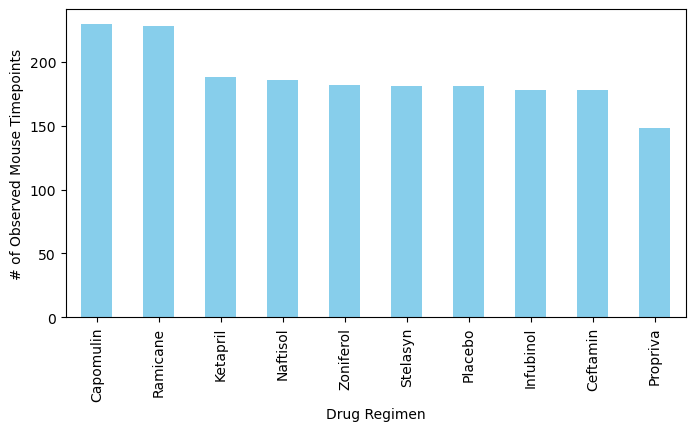

In [39]:
# Calculate the total number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar chart showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
regimen_counts.plot(kind='bar', color='skyblue', figsize=(8,4))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

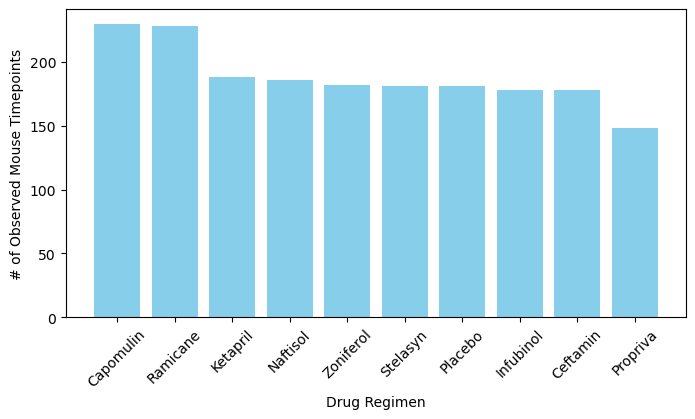

In [40]:
# Create a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
plt.figure(figsize=(8,4))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

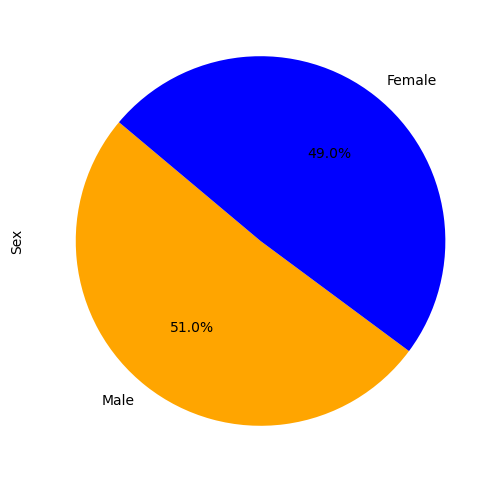

In [41]:
# Calculate the distribution of female versus male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Create a pie chart show the distribution of female versus male mice using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6), colors=['orange', 'blue'])
plt.ylabel('Sex')
plt.show()

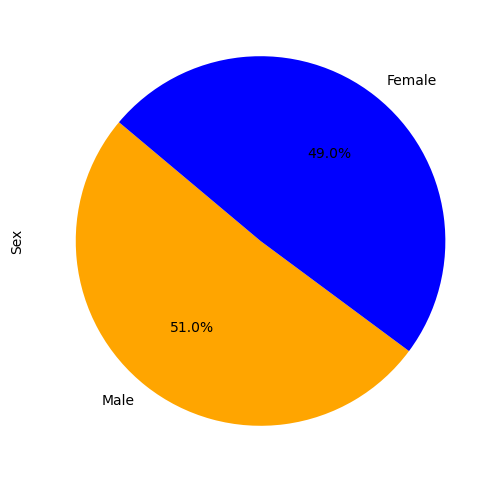

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['orange', 'blue'])
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse,create a Grouped DataFrame for the Last time point
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = last_timepoint.merge(cleaned_data, on=['Mouse ID', 'Timepoint'])
merged_last_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels), create lists for Treatments and Tumor volumn data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Loop through treatments to extract final tumor volumes
for treatment in treatments:
    final_tumor_volumes = merged_last_timepoint[merged_last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(final_tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_volumes[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    
    print(f"{treatment} outliers: {outliers}")


Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


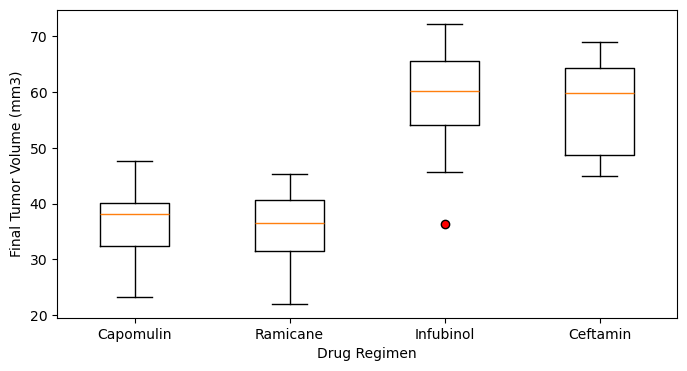

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 4))
plt.boxplot(tumor_volumes, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

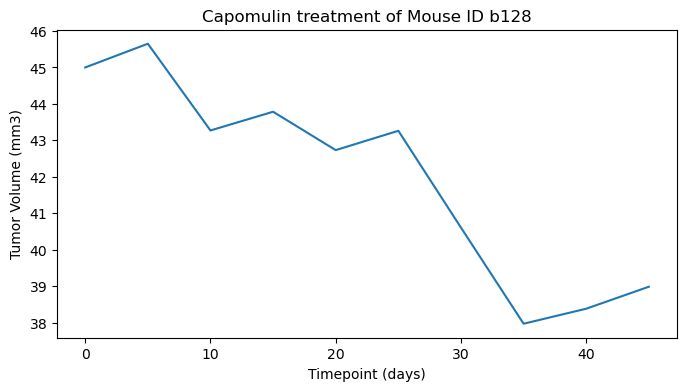

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
# Select the first mouse
capomulin_mice = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
selected_mouse_id = capomulin_mice[0] 

# Extract data for the selected mouse
selected_mouse_data = cleaned_data[cleaned_data['Mouse ID'] == selected_mouse_id]

# Generate a line plot using Matplotlib
plt.figure(figsize=(8, 4))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of Mouse ID {selected_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

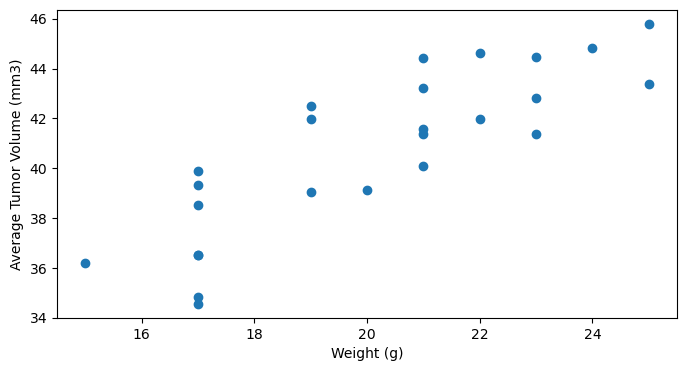

In [45]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Tumor Volume (mm3)']

# Merge average tumor volume with mouse metadata to get the weight
capomulin_merged = capomulin_avg_tumor_volume.reset_index().merge(mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Generate a scatter plot using Matplotlib
plt.figure(figsize=(8, 4))
plt.scatter(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'])
print(f"The correlation coefficent between mouse weight and average tumor volume is {correlation[0]:.2f}")


The correlation coefficent between mouse weight and average tumor volume is 0.84


In [29]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'])

# Create a regression line
regress_values = capomulin_merged['Weight (g)']*slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

# Display the regression line equation
print(line_eq)

y = 0.95x + 21.55


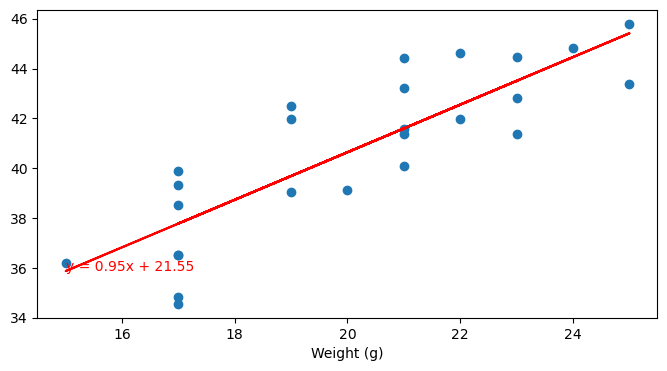

In [47]:
# Generate a scatter plot with linear regression model using Matplotlib
plt.figure(figsize=(8,4))
plt.scatter(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'])
plt.plot(capomulin_merged['Weight (g)'], regress_values, color='red')
plt.xlabel('Weight (g)')
plt.annotate(line_eq, (capomulin_merged['Weight (g)'].min(), regress_values.min()), fontsize=10, color='red')
plt.show()